# **Exploração e análise de dados de crédito com SQL**

*Esse notebook faz parte do curso SQL para análise de dados da EBAC.*

## Dados: 

Temos em nosso dataset informações de clientes de um banco e possuem as seguintes colunas: 

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m  = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no **AWS Athena** junto com o **S3 Bucket** com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

## **Exploração de dados:**

Vamos começar analizando o que temos na nossa base de dados. Vejamos:

**Analisaremos a princípio a quantidade de informações na nossa base de dados**

Query: SELECT count(*) FROM credito
> Reposta: 2564 linhas

**Como são os dados** 

Query: SELECT * FROM credito LIMIT 10;
![Dez primeiras linhas do dataset](https://github.com/marianeneiva/sqlEBAC/blob/main/limit10.png?raw=true)

> Podemos perceber que existem valores nulos na tabela('na') vamos analisar cada tipo de dado e colher informações relevantes!

**Quais os tipos de cada dado**

**Query:** DESCRIBE credito

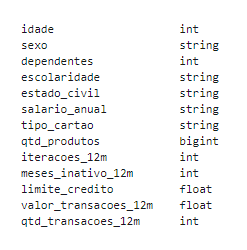

> Já sabemos quais são os tipos de dados, analisaremos as variáveis que não são numéricas para extrairmos alguns insights!

**Vejamos quais são os tipos de escolaridade disponíveis no dataset**

**Query:** SELECT DISTINCT escolaridade FROM credito

![Tipos de escolaridade](https://github.com/marianeneiva/sqlEBAC/blob/main/escolaridade.png?raw=true)

> Temos aqui vários níveis de escolaridade e é possível perceber que temos valores nulos (na) no dataset, trataremos isso mais adiante!

Vejamos se temos mais valores nulos!

**Quais são os tipos de estado_civil disponíveis no dataset?**

Query: SELECT DISTINCT estado_civil FROM credito

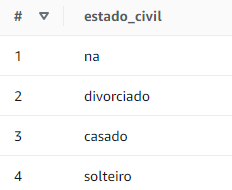

> Aqui também existem valores nulos!

**Quais são os tipos de salario_anual disponíveis no dataset?**

Query: SELECT DISTINCT salario_anual FROM credito

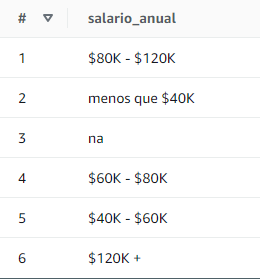

> O que está informado é apenas a faixa salarial de cada um. Aqui também possuem valores nulos.

**Quais são os tipos de cartões disponíveis no dataset?**

Query: SELECT DISTINCT tipo_cartao FROM credito

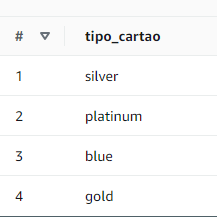

> Aqui vemos que não há necessidade de tratar valores nulos.

**Vejamos se na coluna "sexo" também possuem valores nulos**

Query: select distinct sexo from credito

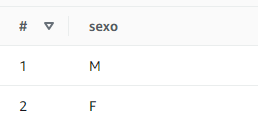

>Aqui também não há valores nulos!

# **Análise de dados**

Agora que exploramos o dados e buscamos entender quais são as informações que temos no nosso banco, podemos analisar as informações para buscar entender o que está acontecendo no banco de dados. Faremos algumas perguntas:

**Quantos clientes temos de cada faixa salarial?**

Query: select count(*), salario_anual from credito group by salario_anual

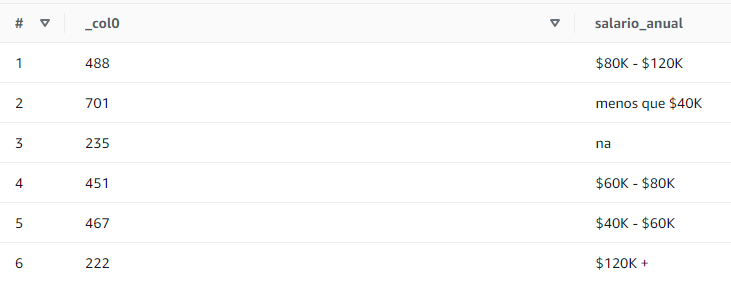

> A maioria dos clientes dessa base de dados possui um renda menor que 40K e existem 235 clientes que não informaram ou não consta a faixa salarial. De certa forma, pode ser interessante para a empresa focar nesse público de mais baixa renda.

****Ainda podemos repetir a consulta excluindo valores nulos! ****

**Usaremos a seguinte Query:**

select salario_anual 
from credito 
where salario_anual != 'na' 
group salario_anual 

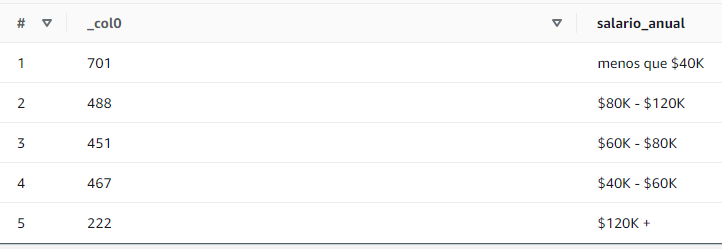




**Vamos analisar quantos clientes são homens e quantos são mulheres**

**Query:** select count(*), sexo from credito group by sexo


![Quantidade para cada sexo](https://github.com/marianeneiva/sqlEBAC/blob/main/faixa_sexo.png?raw=true)

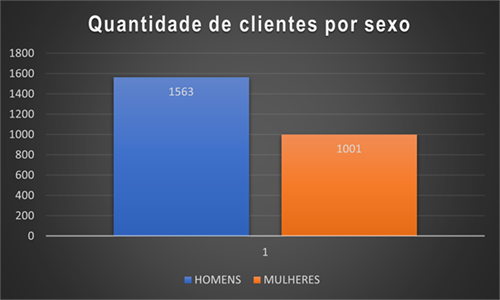


> A maioria dos clientes desse banco é homem! Do csv extraído dos dados é possível gerar um gráfico e comparar melhor a proporção de masculino/feminino

****Analisaremos agora a media das idades entre homens e mulheres para descobrir se há informação relevante ****

**Query:** select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo
![Média de idades por sexo](https://github.com/marianeneiva/sqlEBAC/blob/main/idade_sexopng.png?raw=true)

> Por meio dessa análise não foi possível extrair nenhuma informação relevante.  A menor idade dos dois sexos é a mesma e a média é muito similar. A única  diferença é a idade máxima mas fato quase irrelevante por a diferença não é tão gritante.


**Qual a maior e menor transação dos clientes?**

**Query:** select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_minima from credito
![Valor transacoes](https://github.com/marianeneiva/sqlEBAC/blob/main/transacoes.png?raw=true)

> Nesse banco de dados temos soma de transações em 12 meses variam de 510.16 a 4776.58 informação importante para o acompanhamento do crescimento do seu produto ao longo dos meses.

**Quais as características dos clientes que possuem os maiores creditos?**

**Query:** 
select max(limite_credito) as limite_credito, estado_civil, dependentes, escolaridade, tipo_cartao, sexo 
from credito 
where escolaridade != 'na' and tipo_cartao != 'na' group by estado_civil,dependentes, escolaridade, tipo_cartao, sexo order by limite_credito desc 

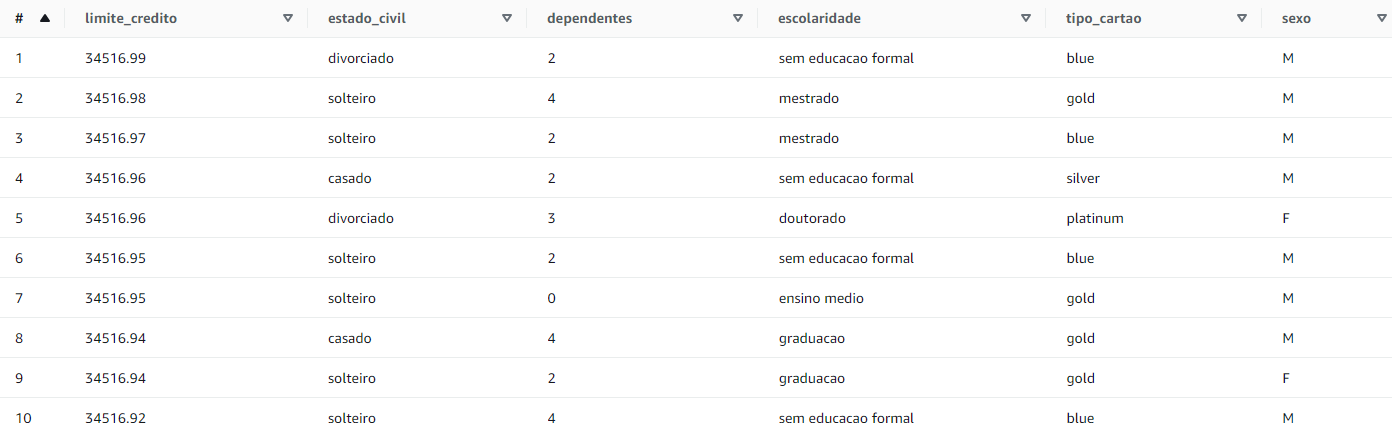

> Não parece haver um impacto da escolaridade no limite tampouco o estado civil e número de dependentes. O limite mais alto é oferecido para um homem sem educação formal e divorciado com 2 dependentes . O cartão também parece não estar relacionado com a escolaridade nem com o limite. Dentre os maiores limites, encontramos clientes com cartão: gold, silver, platinum e blue

**Quais as características do cliente que possui o menor limite de crédito?**

**Query:** 
select min(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc 

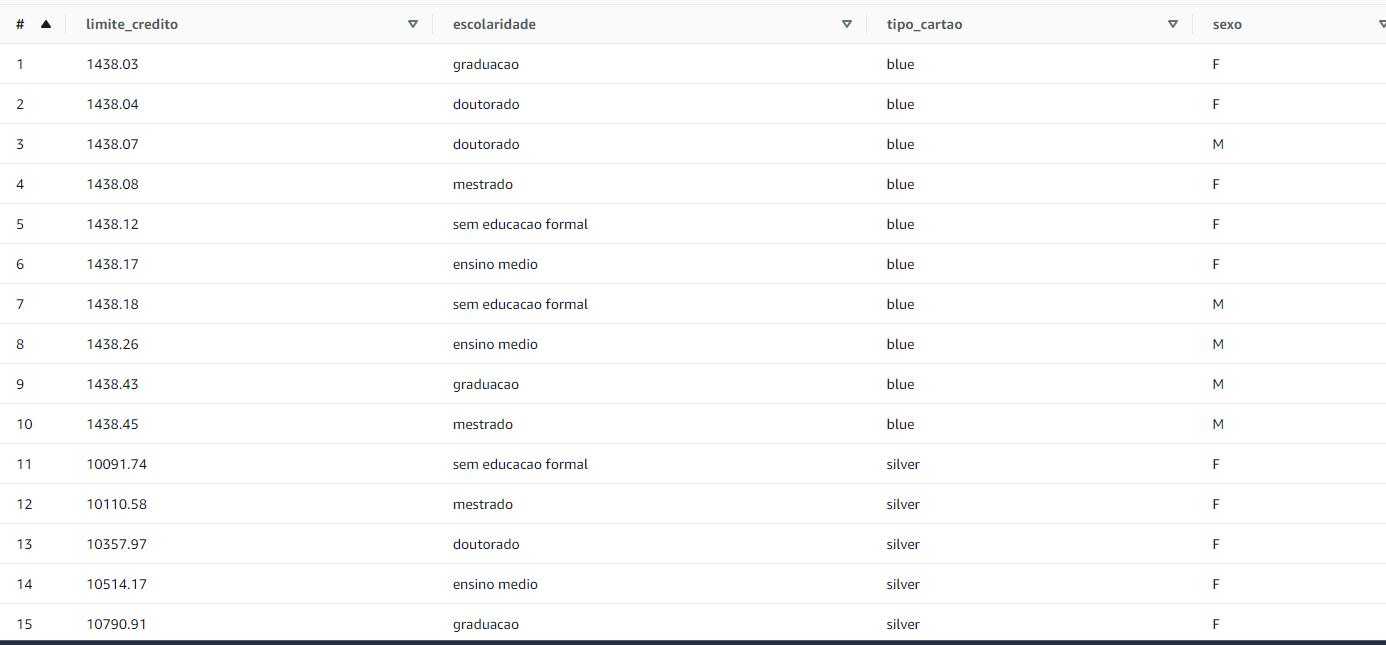


> Podemos ver que uma mulher com ecolaridade "Graduação" possui o menor limite de crédito e um cartão blue! 

**Será que as mulheres possuem menor limite de crédito?**

**Query:** 
select count(*) limite_credito,sexo from credito group by sexo

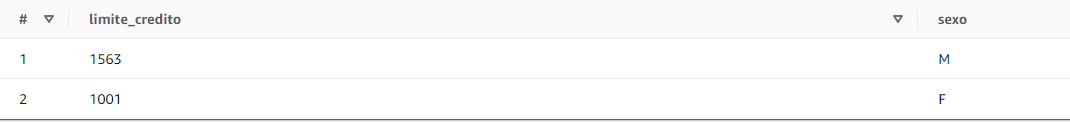

> De fato as mulheres aqui possuem um limite de crédito menor que os homens! Poderiamos até refletir na questão da desigualdade de poder aquisitivo por sexo.

**Vamos ver a quantidade de tempo que os clientes ficam sem usar o cartão?**

**Query:** 
SELECT count(*), meses_inativo_12m as meses_inativo_12m from credito group by meses_inativo_12m

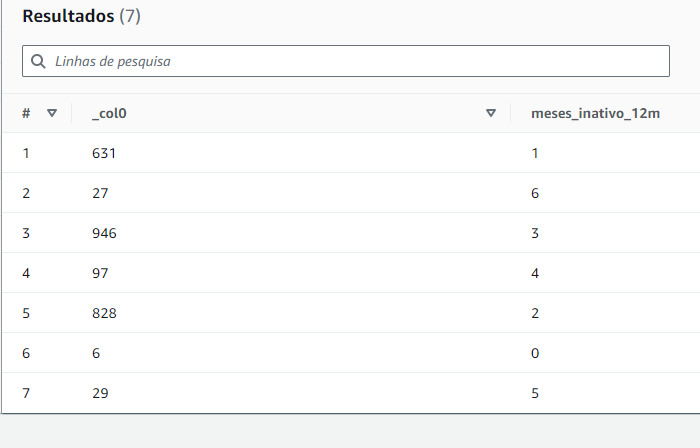

>946 pessoas ficaram sem utilizar o cartão por 3 meses! Poderia ser oferecido alguma vantagem que incentivasse o uso do cartão para esse público?

**Vamos ver quem fica mais tempo sem usar o cartão? Homens ou mulheres?**

**Query:** 
SELECT max(meses_inativo_12m), sexo from credito group by sexo

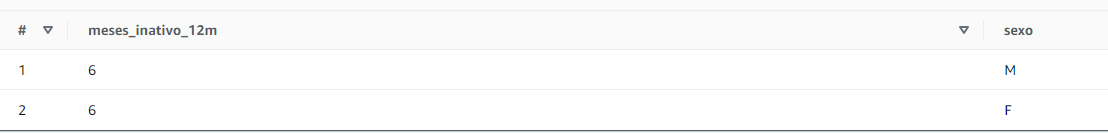

>A questão do sexo também não tem influência em relação aos gastos mensais! Ambos ficaram sem utilizar o cartão por 6 meses!

**Vejamos se as mulheres gastam mais**

**Query:** 
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as  media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo 
from credito
group by sexo 


![Valor transacoes/sexo](https://github.com/marianeneiva/sqlEBAC/blob/main/quemgastamais.png?raw=true)

> Apesar da diferença nos limites, os gastos de homens e mulheres são similares!


**E por último o salário impacta no limite?**

**Query:** select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite,  sexo,   salario_anual from credito 
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(valor_transacoes_12m) desc

![Valor salario_anualLimite](https://github.com/marianeneiva/sqlEBAC/blob/main/salarioAnualMediaLimite.png?raw=true)

>SIM! As pessoas que tem menor faixa salarial também apresentam menor limite de credito!

# Conclusão

Essas foram **algumas** análises extraídas do dataset de crédito.  

Insights Extraídos:

- A maior parte dos clientes possui renda até 40K 
- A maior parte dos clientes é do sexo masculino!
- A escolaridade não parece influenciar no limite nem no tipo do cartão
- Os clientes com maiores limites são em sua maioria homens! Poderíamos até refletir na questão da desigualdade de poder   aquisitivo por sexo.
- 946 pessoas ficaram sem utilizar o cartão por 3 meses! Podemos buscar incentivos para diminuição desse número.
- A questão do sexo também não tem influência em relação aos gastos mensais! Ambos ficaram sem utilizar o cartão por 6 meses!
- Os clientes com menores limites são em sua maioria mulheres
- Dentre os menores limites não há presença de cartão platinum
- A faixa salarial impacta diretamente no limite de crédito
- Não existem clientes com salário anual acima de 60K do sexo feminino, o que fortalece a questão da desigualdade salarial

**Dentre os dados explorados ficaram bem claros a diferença salarial entre homens e mulheres**

